In [111]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import numpy as np

import warnings
from optimize_linear import optimize
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
df = pd.read_csv("new_example_profiles/Oregon_ID118800.csv")


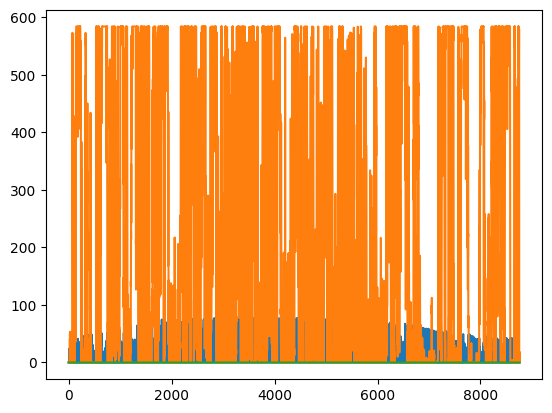

In [113]:
T = 8760


wind = df["Wind [kWh]"][:T] * 1e-3
solar = df["Solar [kWh]"][:T] * 1e-3
battery = df["Battery Dispatched [kWh]"][:T] * 1e-3
renewable_powers = pd.DataFrame()
renewable_powers["solar"] = solar
renewable_powers["wind"] = wind
renewable_powers["battery"] = battery


plt.plot(solar)
plt.plot(wind)
plt.plot(battery)


max_value = {}
max_value["solar"] = 1080
max_value["wind"] = 1080
max_value["battery"] = 520


Optimized for eps = 10.0 and iter =0 and got LCOH = 43284230000.0
Optimized for eps = 12.91549665014884 and iter =1 and got LCOH = 43284230000.0
Optimized for eps = 16.68100537200059 and iter =2 and got LCOH = 43284230000.0
Optimized for eps = 21.544346900318832 and iter =3 and got LCOH = 58.46608352359208
Optimized for eps = 27.825594022071243 and iter =4 and got LCOH = 58.46608352359208
Optimized for eps = 35.938136638046274 and iter =5 and got LCOH = 58.46608352359208
Optimized for eps = 46.41588833612777 and iter =6 and got LCOH = 42.09904929546619
Optimized for eps = 59.94842503189409 and iter =7 and got LCOH = 42.397919212750445
Optimized for eps = 77.4263682681127 and iter =8 and got LCOH = 45.83617614541105
Optimized for eps = 100.0 and iter =9 and got LCOH = 51.114696898035426


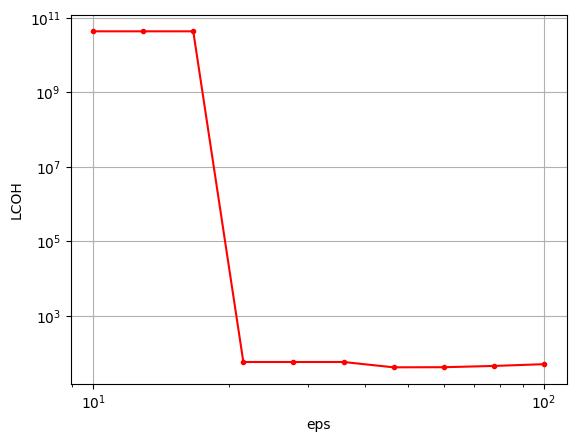

In [114]:
res = optimize(
    T,
    renewable_powers,
    battery_storage_hours=2,
    stack_life_hrs=80000,
    cost_year=2025,
    max_values=max_value,
)


## Wind results

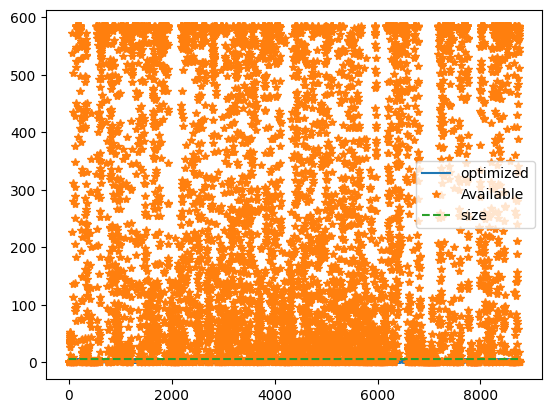

In [115]:
plt.plot(res["used_wind"], label="optimized")
plt.plot(res["given_wind"], "*", label="Available")
plt.plot(
    np.ones(
        T,
    )
    * res["size_wind"]
   ,
    "--",
    label="size",
)
plt.legend()


## Solar results:


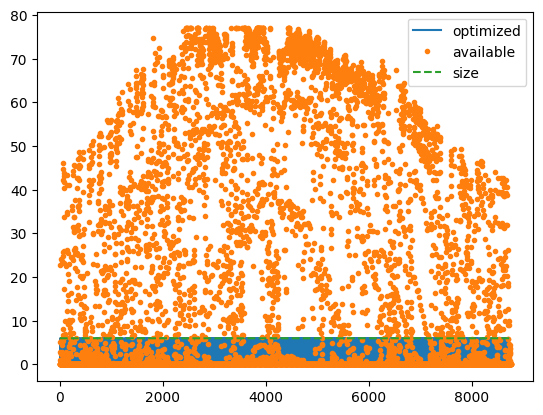

In [116]:
plt.plot(res["used_solar"], label="optimized")
plt.plot(res["given_solar"], ".", label="available")
plt.plot(
    np.ones(
        T,
    )* res["size_solar"]
   ,
    "--",
    label="size",
)
plt.legend()


## Battery results

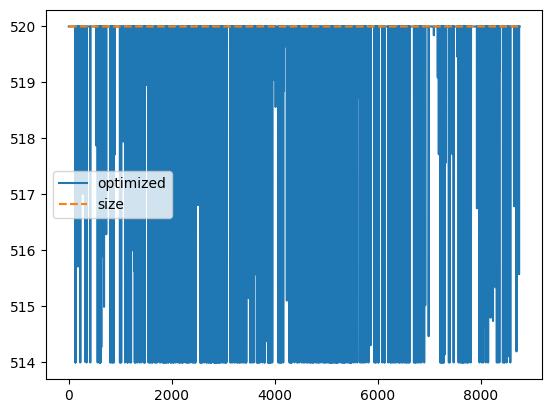

In [117]:

plt.plot(res["used_bat"], label="optimized")
plt.plot(
    np.ones(
        T,
    )
    * res["size_battery"],
    "--",
    label="size",
)
plt.legend()


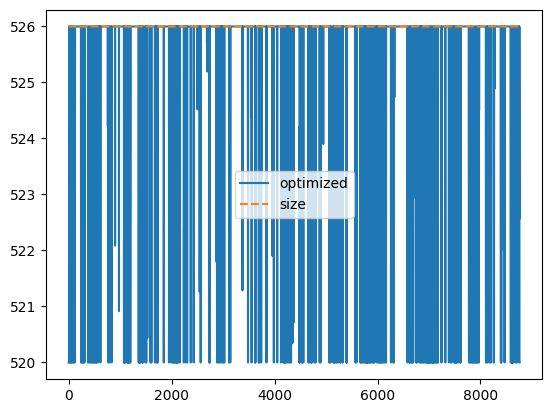

In [118]:
plt.plot(res["used_elec"], label="optimized")
plt.plot(
    np.ones(
        T,
    )
    * res["size_elec"],
    "--",
    label="size",
)
plt.legend()
